# Hello Object Detection

A very basic introduction to using object detection models with OpenVINO™.

The [horizontal-text-detection-0001](https://docs.openvino.ai/2023.0/omz_models_model_horizontal_text_detection_0001.html) model from [Open Model Zoo](https://github.com/openvinotoolkit/open_model_zoo/) is used. It detects horizontal text in images and returns a blob of data in the shape of `[100, 5]`. Each detected text box is stored in the `[x_min, y_min, x_max, y_max, conf]` format, where the
`(x_min, y_min)` are the coordinates of the top left bounding box corner, `(x_max, y_max)` are the coordinates of the bottom right bounding box corner and `conf` is the confidence for the predicted class.

#### Table of contents:
- [Imports](#Imports)
- [Download model weights](#Download-model-weights)
- [Select inference device](#Select-inference-device)
- [Load the Model](#Load-the-Model)
- [Load an Image](#Load-an-Image)
- [Do Inference](#Do-Inference)
- [Visualize Results](#Visualize-Results)


## Imports
[back to top ⬆️](#Table-of-contents:)


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import openvino as ov

## Select inference device
[back to top ⬆️](#Table-of-contents:)

select device from dropdown list for running inference using OpenVINO

In [ ]:
core = ov.Core()
options=core.available_devices
options

## Load the Model
[back to top ⬆️](#Table-of-contents:)


In [ ]:
model = core.read_model(model='./model/horizontal-text-detection-0001.xml')
compiled_model = core.compile_model(model=model, device_name=options[2])

input_layer_ir = compiled_model.input(0)
output_layer_ir = compiled_model.output("boxes")

## Load an Image
[back to top ⬆️](#Table-of-contents:)


In [ ]:
# Text detection models expect an image in BGR format.
image = cv2.imread('./data/intel_rnb.jpg')

# N,C,H,W = batch size, number of channels, height, width.
N, C, H, W = input_layer_ir.shape

# Resize the image to meet network expected input sizes.
resized_image = cv2.resize(image, (W, H))

# Reshape to the network input shape.
input_image = np.expand_dims(resized_image.transpose(2, 0, 1), 0)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB));

## Do Inference
[back to top ⬆️](#Table-of-contents:)


In [ ]:
# Create an inference request.
boxes = compiled_model([input_image])[output_layer_ir]

# Remove zero only boxes.
boxes = boxes[~np.all(boxes == 0, axis=1)]

## Visualize Results
[back to top ⬆️](#Table-of-contents:)


In [ ]:
# For each detection, the description is in the [x_min, y_min, x_max, y_max, conf] format:
# The image passed here is in BGR format with changed width and height. To display it in colors expected by matplotlib, use cvtColor function
def convert_result_to_image(bgr_image, resized_image, boxes, threshold=0.3, conf_labels=True):
    # Define colors for boxes and descriptions.
    colors = {"red": (255, 0, 0), "green": (0, 255, 0)}

    # Fetch the image shapes to calculate a ratio.
    (real_y, real_x), (resized_y, resized_x) = bgr_image.shape[:2], resized_image.shape[:2]
    ratio_x, ratio_y = real_x / resized_x, real_y / resized_y

    # Convert the base image from BGR to RGB format.
    rgb_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)

    # Iterate through non-zero boxes.
    for box in boxes:
        # Pick a confidence factor from the last place in an array.
        conf = box[-1]
        if conf > threshold:
            # Convert float to int and multiply corner position of each box by x and y ratio.
            # If the bounding box is found at the top of the image, 
            # position the upper box bar little lower to make it visible on the image. 
            (x_min, y_min, x_max, y_max) = [
                int(max(corner_position * ratio_y, 10)) if idx % 2 
                else int(corner_position * ratio_x)
                for idx, corner_position in enumerate(box[:-1])
            ]

            # Draw a box based on the position, parameters in rectangle function are: image, start_point, end_point, color, thickness.
            rgb_image = cv2.rectangle(rgb_image, (x_min, y_min), (x_max, y_max), colors["green"], 3)

            # Add text to the image based on position and confidence.
            # Parameters in text function are: image, text, bottom-left_corner_textfield, font, font_scale, color, thickness, line_type.
            if conf_labels:
                rgb_image = cv2.putText(
                    rgb_image,
                    f"{conf:.2f}",
                    (x_min, y_min - 10),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    0.8,
                    colors["red"],
                    1,
                    cv2.LINE_AA,
                )

    return rgb_image

In [ ]:
plt.figure(figsize=(10, 6))
plt.axis("off")
plt.imshow(convert_result_to_image(image, resized_image, boxes, conf_labels=True));

In [ ]:
boxes

# 요약본

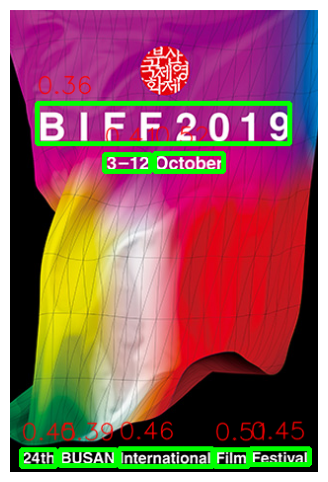

In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import openvino as ov

core = ov.Core()
model = core.read_model(model='model/horizontal-text-detection-0001.xml')
compiled_model = core.compile_model(model=model, device_name='GPU.1')

input_layer = compiled_model.input(0)
output_layer = compiled_model.output("boxes")

# Text detection models expect an image in BGR format.
image = cv2.imread('data/biff.jpg')

# N,C,H,W = batch size, number of channels, height, width.
N, C, H, W = input_layer.shape

# Resize the image to meet network expected input sizes.
resized_image = cv2.resize(image, (W, H))

# Reshape to the network input shape.
input_image = np.expand_dims(resized_image.transpose(2, 0, 1), 0)

# Create an inference request.
boxes = compiled_model([input_image])[output_layer]

# Remove zero only boxes.
boxes = boxes[~np.all(boxes == 0, axis=1)]

# For each detection, the description is in the [x_min, y_min, x_max, y_max, conf] format:
# The image passed here is in BGR format with changed width and height. To display it in colors expected by matplotlib, use cvtColor function
def convert_result_to_image(bgr_image, resized_image, boxes, threshold=0.3, conf_labels=True):
    # Define colors for boxes and descriptions.
    colors = {"red": (255, 0, 0), "green": (0, 255, 0)}

    # Fetch the image shapes to calculate a ratio.
    (real_y, real_x), (resized_y, resized_x) = bgr_image.shape[:2], resized_image.shape[:2]
    ratio_x, ratio_y = real_x / resized_x, real_y / resized_y

    # Convert the base image from BGR to RGB format.
    rgb_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)

    # Iterate through non-zero boxes.
    for box in boxes:
        # Pick a confidence factor from the last place in an array.
        conf = box[-1]
        if conf > threshold:
            # Convert float to int and multiply corner position of each box by x and y ratio.
            # If the bounding box is found at the top of the image, 
            # position the upper box bar little lower to make it visible on the image. 
            (x_min, y_min, x_max, y_max) = [
                int(max(corner_position * ratio_y, 10)) if idx % 2 
                else int(corner_position * ratio_x)
                for idx, corner_position in enumerate(box[:-1])
            ]

            # Draw a box based on the position, parameters in rectangle function are: image, start_point, end_point, color, thickness.
            rgb_image = cv2.rectangle(rgb_image, (x_min, y_min), (x_max, y_max), colors["green"], 3)

            # Add text to the image based on position and confidence.
            # Parameters in text function are: image, text, bottom-left_corner_textfield, font, font_scale, color, thickness, line_type.
            if conf_labels:
                rgb_image = cv2.putText(
                    rgb_image,
                    f"{conf:.2f}",
                    (x_min, y_min - 10),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    0.8,
                    colors["red"],
                    1,
                    cv2.LINE_AA,
                )

    return rgb_image

plt.figure(figsize=(10, 6))
plt.axis("off")
plt.imshow(convert_result_to_image(image, resized_image, boxes, conf_labels=True));

In [2]:
boxes

array([[3.99946716e+02, 8.11520233e+01, 5.61838989e+02, 1.36155273e+02,
        5.36777794e-01],
       [2.61954163e+02, 6.84256058e+01, 3.85380066e+02, 1.20920609e+02,
        4.74904418e-01],
       [6.16452637e+02, 2.80120239e+02, 6.66263855e+02, 3.11769623e+02,
        4.49359804e-01],
       [2.07640488e+02, 6.28020172e+01, 2.34421326e+02, 1.07031265e+02,
        3.74582320e-01],
       [5.17440063e+02, 5.56030579e+02, 5.49294922e+02, 5.87316589e+02,
        3.26068848e-01],
       [2.23852158e+01, 4.54875565e+01, 1.88719910e+02, 1.02219788e+02,
        3.04749966e-01]], dtype=float32)

# 배포

In [12]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import openvino as ov
import gradio as gr
import PIL
# import matplotlib.pyplot as plt

core = ov.Core()
model = core.read_model(model='model/horizontal-text-detection-0001.xml')
compiled_model = core.compile_model(model=model, device_name='GPU.1')

input_layer = compiled_model.input(0)
output_layer = compiled_model.output("boxes")

def preprocess(image):
    image = np.array(image)
    image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
    N, C, H, W = input_layer.shape
    resized_image = cv2.resize(image, (W, H))
    input_image = np.expand_dims(resized_image.transpose(2, 0, 1), 0)
    return input_image, resized_image

def convert_result_to_image(bgr_image, resized_image, boxes, threshold=0.3, conf_labels=True):
    # Define colors for boxes and descriptions.
    colors = {"red": (255, 0, 0), "green": (0, 255, 0)}

    # Fetch the image shapes to calculate a ratio.
    (real_y, real_x), (resized_y, resized_x) = (
        bgr_image.shape[:2],       # 517, 690
        resized_image.shape[:2],   #704, 704
    )
    ratio_x, ratio_y = real_x / resized_x, real_y / resized_y

    # Convert the base image from BGR to RGB format.
    # rgb_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)

    # Iterate through non-zero boxes.
    for box in boxes:
        # Pick a confidence factor from the last place in an array.
        conf = box[-1]
        if conf > threshold:
            # Convert float to int and multiply corner position of each box by x and y ratio.
            # If the bounding box is found at the top of the image,
            # position the upper box bar little lower to make it visible on the image.
            (x_min, y_min, x_max, y_max) = [
                (int(max(corner_position * ratio_y, 10)) if idx % 2 else int(corner_position * ratio_x)) for idx, corner_position in enumerate(box[:-1])
            ]

            # Draw a box based on the position, parameters in rectangle function are: image, start_point, end_point, color, thickness.
            rgb_image = cv2.rectangle(bgr_image, (x_min, y_min), (x_max, y_max), colors["green"], 3)

            # Add text to the image based on position and confidence.
            # Parameters in text function are: image, text, bottom-left_corner_textfield, font, font_scale, color, thickness, line_type.
            if conf_labels:
                rgb_image = cv2.putText(
                    rgb_image,
                    f"{conf:.2f}",
                    (x_min, y_min - 10),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    0.8,
                    colors["red"],
                    1,
                    cv2.LINE_AA,
                )

    return rgb_image
    
def predict_image(image):
    input_image, resized_image = preprocess(image)
    boxes = compiled_model([input_image])[output_layer]
    boxes = boxes[~np.all(boxes == 0, axis=1)]
    canvas = convert_result_to_image(image, resized_image, boxes, conf_labels=True)
    return canvas
'''
image=cv2.imread('data/biff.jpg')
plt.imshow(predict_image(image));
'''
# Set up the Gradio interface
demo = gr.Interface(predict_image, gr.Image(), "image",  # Use Textbox to show the predicted class
             examples=["./data/intel_rnb.jpg"])
demo.launch()

Running on local URL:  http://127.0.0.1:7864

To create a public link, set `share=True` in `launch()`.
